Attribute Information:

    1. CRIM      per capita crime rate by town
    2. ZN        proportion of residential land zoned for lots over 
                 25,000 sq.ft.
    3. INDUS     proportion of non-retail business acres per town
    4. CHAS      Charles River dummy variable (= 1 if tract bounds 
                 river; 0 otherwise)
    5. NOX       nitric oxides concentration (parts per 10 million)
    6. RM        average number of rooms per dwelling
    7. AGE       proportion of owner-occupied units built prior to 1940
    8. DIS       weighted distances to five Boston employment centres
    9. RAD       index of accessibility to radial highways
    10. TAX      full-value property-tax rate per $10,000
    11. PTRATIO  pupil-teacher ratio by town
    12. B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks 
                 by town
    13. LSTAT    % lower status of the population
    14. MEDV     Median value of owner-occupied homes in $1000's

## Import Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import sys
sys.path.append('../')
import linear_regression

### Reading and Understanding Data

In [2]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data'
housing_df = pd.read_csv(
    url, 
    header=None, 
    sep='\s+',
    names=[
        "CRIM",
        "ZN",
        "INDUS", 
        "CHAS",
        "NOX",
        "RM",
        "AGE",
        "DIS",
        "RAD",
        "TAX",
        "PTRATIO",
        "B" ,
        "LSTAT",
        "MEDV"
    ] 
)

housing_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


#### Database Info

In [7]:
housing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [8]:
housing_df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


## Select Columns Database 

In [2]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data'
housing_df = pd.read_csv(
    url, 
    header=None, 
    sep='\s+',
    names=[
        "CRIM",
        "ZN",
        "INDUS", 
        "CHAS",
        "NOX",
        "RM",
        "AGE",
        "DIS",
        "RAD",
        "TAX",
        "PTRATIO",
        "B" ,
        "LSTAT",
        "MEDV"
    ] 
)

# Take 5 important columns:
# DIS       weighted distances to five Boston employment centres
# INDUS     proportion of non-retail business acres per town
# CRIM      per capita crime rate by town
# RM        average number of rooms per dwelling
# MEDV      median value of owner-occupied homes in $1000's
cols = ['DIS', 'INDUS', 'CRIM', 'RM', 'MEDV']

df = housing_df[cols]
df.head()

,DIS,INDUS,CRIM,RM,MEDV
0,4.0900,2.31,0.00632,6.575,24.0
1,4.9671,7.07,0.02731,6.421,21.6
2,4.9671,7.07,0.02729,7.185,34.7
3,6.0622,2.18,0.03237,6.998,33.4
4,6.0622,2.18,0.06905,7.147,36.2


### EDA

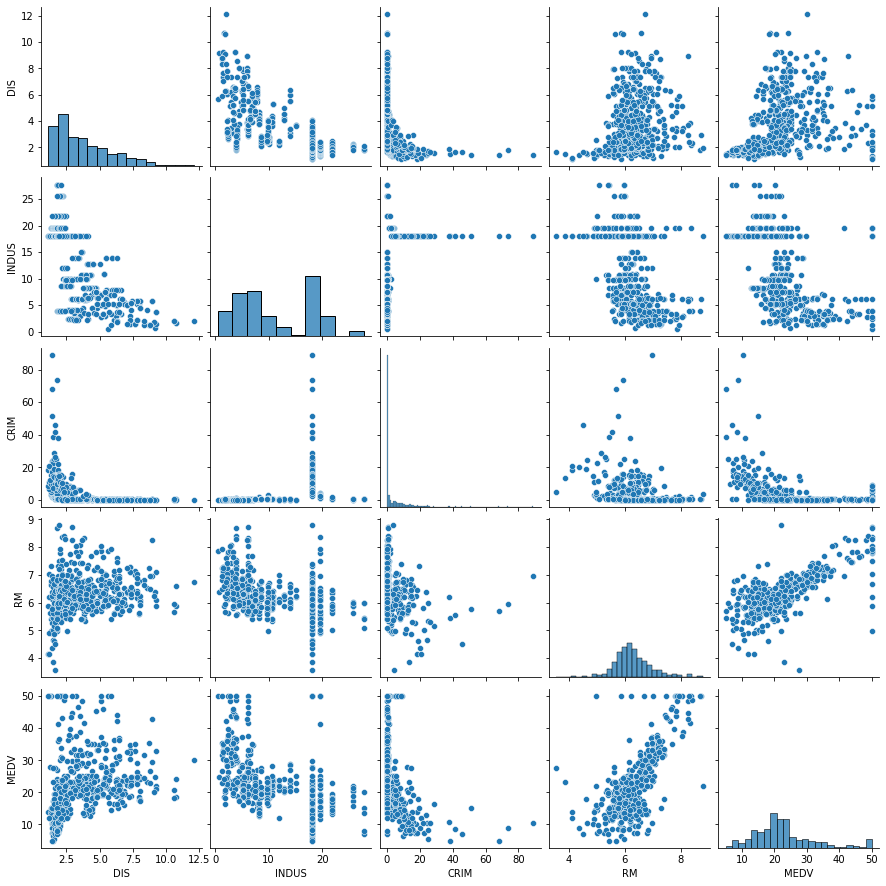

In [40]:
sns.pairplot(df)

<Axes: xlabel='MEDV', ylabel='Count'>

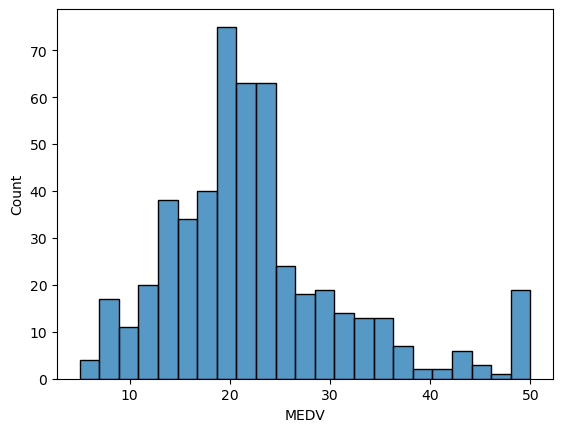

In [7]:
# Dependent variable
sns.histplot(df.MEDV)

<AxesSubplot:>

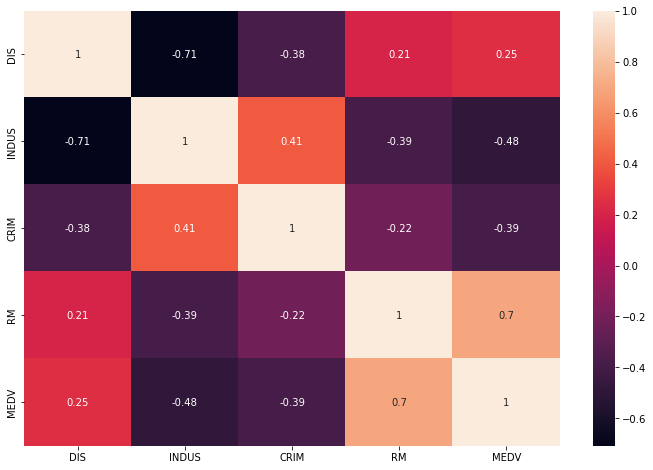

In [41]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot=True)

## Training an Univariable Linear Model

In [4]:
X = df['RM'].values.reshape(-1,1)
y = df['MEDV'].values.reshape(-1,1)

In [5]:
trained_model = linear_regression.linear_regression(X, y, test_size=0.0)

### Model Evaluation

Text(0.5, 0, 'Rooms Average [RM]')

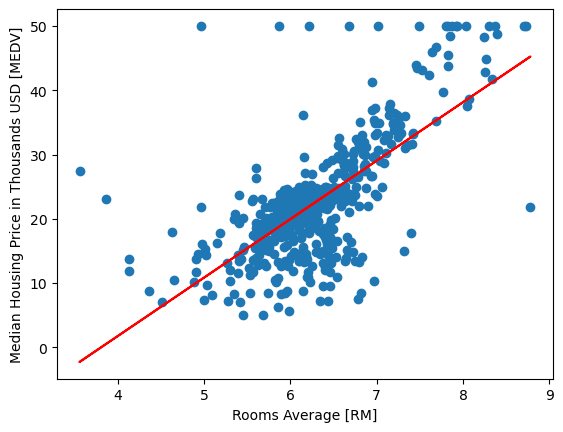

In [11]:
predictions = trained_model.predict(X)

plt.scatter(X, y)
plt.plot(X, predictions, 'r')
plt.ylabel('Median Housing Price in Thousands USD [MEDV]')
plt.xlabel('Rooms Average [RM]')

### Model Prediction

In [32]:
import numpy as np
rooms_num = 5
print('House Price Prediction with {} rooms in Boston: {:.4f} [Thousands USD]'.format(
    rooms_num, 
    rooms_num*trained_model.coef_.item() + trained_model.intercept_.item() # linear regression equation
    ))

House Price Prediction with 5 rooms in Boston: 10.8399 [Thousands USD]


## Training a Multivariate Linear Model

In [3]:
X = df[['DIS', 'INDUS', 'CRIM', 'RM']]
y = df['MEDV'].values.reshape(-1,1)

In [4]:
trained_model, X_test, y_test = linear_regression.linear_regression(X, y, test_size=0.4, standardize=True)

### Model Evaluation

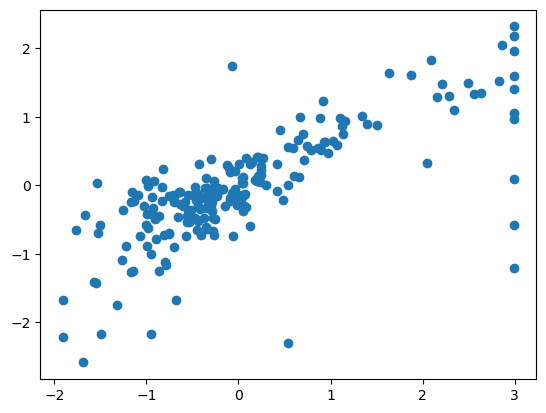

In [5]:
y_pred = trained_model.predict(X_test)
plt.scatter(y_test, y_pred)

In [6]:
# Evaluation metrics
linear_regression.evaluation_metric(y_test, y_pred, metric='all')

{'MAE': 0.4843, 'MSE': 0.5652, 'RMSE': 0.7518, 'r2_score': 0.5652}